In [1]:
#!pip install tensorflow

In [2]:
from Hopper import *
import tensorflow as tf
import numpy as np
import Prepper

%matplotlib inline

# Hopper

In [3]:
verbose = True
h = dbms(verbose=verbose)

DROP TABLE IF EXISTS i_ids;

CREATE TABLE i_ids (
	i_id TEXT NOT NULL,
	PRIMARY KEY (i_id)
);

DROP TABLE IF EXISTS i_windows;

CREATE TABLE i_windows (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

DROP TABLE IF EXISTS i_partitions;

CREATE TABLE i_partitions (
	i_id TEXT NOT NULL,
	partition TEXT NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

DROP TABLE IF EXISTS i_relcal;

CREATE TABLE i_relcal (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL
);



## Load Tables

In [4]:
_tc = table_config("characteristics_0", 
                  ["age", "sex", "eth", "bin_ldc", "job"], 
                  ["real", "bin", "ldc", "ldc", "hdc"],
                  has_times=False,
                  primary_key=True)
h.create_fvm_with_csv(_tc, "data/characteristics_0.csv", delimiter=',')


_tc = table_config("samples_0", 
                  ["SBP", "DBP", "type"], 
                  ["real", "real", "ldc"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_0.csv", delimiter=',')



_tc = table_config("samples_1", 
                  ["tmps", "hrs", "sbps", "rrs", "dbps", "sats", "wgts"],
                  ["real", "real", 'real', "real", "real", "real", "real"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_1.csv", delimiter=',')


_tc = table_config("samples_2", 
                  ["dx"],
                  ["hdc"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_2.csv", delimiter=',')



_tc = table_config("samples_3", 
                  ["outcome"],
                  ["bin"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_3.csv", delimiter=',')


_tc = table_config("samples_4", 
                  ["q"],
                  ["bin"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_4.csv", delimiter=',')


DROP TABLE IF EXISTS characteristics_0;

CREATE TABLE characteristics_0 (
	i_id TEXT NOT NULL,
	age REAL NOT NULL,
	sex TEXT NOT NULL,
	eth TEXT NOT NULL,
	bin_ldc TEXT NOT NULL,
	job TEXT NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

INSERT OR IGNORE INTO i_ids (i_id) VALUES (?);

INSERT  INTO characteristics_0 (i_id, age, sex, eth, bin_ldc, job) VALUES (?, ?, ?, ?, ?, ?);

CREATE INDEX i_index_characteristics_0_i_id ON characteristics_0(i_id);

CREATE INDEX i_index_characteristics_0_age ON characteristics_0(age);

CREATE INDEX i_index_characteristics_0_sex ON characteristics_0(sex);

CREATE INDEX i_index_characteristics_0_eth ON characteristics_0(eth);

CREATE INDEX i_index_characteristics_0_bin_ldc ON characteristics_0(bin_ldc);

CREATE INDEX i_index_characteristics_0_job ON characteristics_0(job);

10000 rows loaded

DROP TABLE IF EXISTS samples_0;

CREATE TABLE samples_0 (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL,
	SBP RE

## Window, Filter, Transform, Aggregate, Normalize Data

In [5]:
#h.dew_it(after_first=35)
h.dew_it(fit_normalization_via_sql_qds=False)

INSERT  INTO i_windows (i_id, i_st, i_et) VALUES (?, ?, ?);

gen_range_table_sql called: af=None, bf=None
INSERT OR IGNORE INTO i_windows 
SELECT * FROM (
	SELECT i_id, MIN(i_st) AS i_st, MAX(i_et) AS i_et
	FROM (
	    SELECT i_id, i_st, i_et
		FROM samples_0
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_1
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_2
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_3
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_4
		
	)
	GROUP BY i_id
);

INSERT  INTO i_partitions (i_id, partition) VALUES (?, ?);

INSERT OR IGNORE INTO i_partitions 
SELECT * FROM (
	SELECT i_id, CASE 
		 WHEN r <= 0.8 THEN "train" 
		 WHEN r <= 0.9 THEN "dev" 
		 WHEN r <= 1.0 THEN "test" 
		 ELSE "test" 
	END
	FROM (SELECT i_id, ABS(RANDOM())/(9223372036854775807.0) AS r FROM i_ids)
);

CREATE VIEW win_samples_0 AS
    SELECT samples_0.i_id,
	MAX(samples_0.i_st, i_windows.i_st) AS i_st,
	MIN(samples_0.i_et, i_windows.i_et) AS i_et,
	SBP,
	DBP,
	type
	FROM (
	    sample

SELECT AVG(sats) AS avg,
       SUM((sats-(SELECT AVG(sats) FROM i_partitions_train_win_samples_1))*
       (sats-(SELECT AVG(sats) FROM i_partitions_train_win_samples_1)))
       /(COUNT(sats)-1) AS var
FROM i_partitions_train_win_samples_1
;

SELECT AVG(wgts) AS avg,
       SUM((wgts-(SELECT AVG(wgts) FROM i_partitions_train_win_samples_1))*
       (wgts-(SELECT AVG(wgts) FROM i_partitions_train_win_samples_1)))
       /(COUNT(wgts)-1) AS var
FROM i_partitions_train_win_samples_1
;

SELECT COUNT(*) FROM i_partitions_train_win_samples_2;

SELECT dx, COUNT(*) AS n
FROM i_partitions_train_win_samples_2
GROUP BY dx
ORDER BY n DESC
;


SELECT COUNT(*) FROM i_partitions_train_win_samples_3;

SELECT outcome, COUNT(*) AS n
FROM i_partitions_train_win_samples_3
GROUP BY outcome
ORDER BY n DESC
;


SELECT COUNT(*) FROM i_partitions_train_win_samples_4;

SELECT q, COUNT(*) AS n
FROM i_partitions_train_win_samples_4
GROUP BY q
ORDER BY n DESC
;


SELECT min(i_st) AS i_st, max(i_et) AS i_et
FROM 

SELECT avg_tmps, min_tmps, max_tmps, avg_hrs, min_hrs, max_hrs, avg_sbps, min_sbps, max_sbps, avg_rrs, min_rrs, max_rrs, avg_dbps, min_dbps, max_dbps, avg_sats, min_sats, max_sats, avg_wgts, min_wgts, max_wgts, count
FROM agg_samples_1
;

SELECT count
FROM agg_samples_2
;

SELECT count
FROM agg_samples_3
;

SELECT count
FROM agg_samples_4
;

CREATE VIEW nrm_characteristics_0 AS
    SELECT i_id,
	(age-48.0)/0.0 as age,
	sex,
	eth_e0,
	eth_e1,
	eth_e2,
	eth_e3,
	eth_e4,
	eth_e5,
	eth__OTHER_,
	bin_ldc_A,
	bin_ldc_B,
	bin_ldc__OTHER_,
	job
	FROM ohe_characteristics_0
	
;

CREATE VIEW nrm_samples_0 AS
    SELECT i_id,
	i_st,
	i_et,
	(avg_SBP-86.6503598170221)/41.29184159553759 as avg_SBP,
	(min_SBP-86.86976326189745)/39.64463317462336 as min_SBP,
	(max_SBP-86.93051620862737)/39.69972686710985 as max_SBP,
	(avg_DBP-85.60696651458821)/36.830205514812455 as avg_DBP,
	(min_DBP-86.84832021150899)/39.82901094932715 as min_DBP,
	(max_DBP-79.48415264021995)/37.43161673451052 as max_DBP,
	avg_type_

# Prepper 

In [6]:
tfp = Prepper.tf_prepper(h)
tfp.features

['i_id',
 'i_duration',
 'characteristics_0/age',
 'characteristics_0/sex',
 'characteristics_0/eth_e0',
 'characteristics_0/eth_e1',
 'characteristics_0/eth_e2',
 'characteristics_0/eth_e3',
 'characteristics_0/eth_e4',
 'characteristics_0/eth_e5',
 'characteristics_0/eth__OTHER_',
 'characteristics_0/bin_ldc_A',
 'characteristics_0/bin_ldc_B',
 'characteristics_0/bin_ldc__OTHER_',
 'characteristics_0/job',
 'samples_0/avg_SBP',
 'samples_0/min_SBP',
 'samples_0/max_SBP',
 'samples_0/avg_DBP',
 'samples_0/min_DBP',
 'samples_0/max_DBP',
 'samples_0/avg_type_c0',
 'samples_0/avg_type_c1',
 'samples_0/avg_type_c2',
 'samples_0/avg_type_c3',
 'samples_0/avg_type_c4',
 'samples_0/avg_type__OTHER_',
 'samples_0/count',
 'samples_1/avg_tmps',
 'samples_1/min_tmps',
 'samples_1/max_tmps',
 'samples_1/avg_hrs',
 'samples_1/min_hrs',
 'samples_1/max_hrs',
 'samples_1/avg_sbps',
 'samples_1/min_sbps',
 'samples_1/max_sbps',
 'samples_1/avg_rrs',
 'samples_1/min_rrs',
 'samples_1/max_rrs',
 'sam

## Fit Prepper to Desired Task

In [7]:
tfp.fit(offsets=[0, 1, 2, 4, 5], label_fns=["samples_3/avg_outcome", ], partition="train")

SELECT job
FROM i_partitions_train_nrm_characteristics_0
;

SELECT concat_dx
FROM i_partitions_train_nrm_samples_2
;



## Make Model

In [8]:
d0 = tf.keras.layers.Dense(units=32, name="encode")
r0 = tf.keras.layers.LSTM(units=32,return_sequences=True, name="RNN_0")
r1 = tf.keras.layers.LSTM(units=16,return_sequences=True, name="RNN_1")

final_model = tfp.build_model(middle_layer_list=[d0, r0, r1])
final_model.compile(loss="binary_crossentropy")
final_model.summary()

Model: "final"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
characteristics_0/job (InputLay [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
samples_2/concat_dx (InputLayer [(None, None, 5)]    0                                            
__________________________________________________________________________________________________
emb_characteristics_0/job (Embe (None, None, 1, 6)   4836        characteristics_0/job[0][0]      
__________________________________________________________________________________________________
emb_samples_2/concat_dx (Embedd (None, None, 5, 10)  80780       samples_2/concat_dx[0][0]        
______________________________________________________________________________________________

In [9]:
d0 = tf.keras.layers.Dense(units=32, name="encode")
r0 = tf.keras.layers.LSTM(units=32,return_sequences=True, name="RNN_0")
r1 = tf.keras.layers.LSTM(units=16,return_sequences=True, name="RNN_1")

final_wo_model = tfp.build_model(middle_layer_list=[d0, r0, r1], ignore_fns=['samples_4/avg_q', 'samples_4/count'])
final_wo_model.compile(loss="binary_crossentropy")
final_wo_model.summary()

Model: "final"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
characteristics_0/job (InputLay [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
samples_2/concat_dx (InputLayer [(None, None, 5)]    0                                            
__________________________________________________________________________________________________
emb_characteristics_0/job (Embe (None, None, 1, 6)   4836        characteristics_0/job[0][0]      
__________________________________________________________________________________________________
emb_samples_2/concat_dx (Embedd (None, None, 5, 10)  80780       samples_2/concat_dx[0][0]        
______________________________________________________________________________________________

## Make TensorFlow Dataset

In [10]:
ds = tfp.transform_to_ds()

SELECT *
FROM i_windows
;

SELECT *
FROM nrm_characteristics_0
;

SELECT *
FROM nrm_samples_0
;

SELECT *
FROM nrm_samples_1
;

SELECT *
FROM nrm_samples_2
;

SELECT *
FROM nrm_samples_3
;

SELECT *
FROM nrm_samples_4
;

SELECT *
FROM i_partitions
;



# Train Model

In [11]:
final_model.fit(ds["train"], epochs=1, validation_data=ds["dev"])
#final_model.fit(ds["test"], epochs=1)

126/126 [==============================] - 120s 954ms/step - loss: 0.4408 - val_loss: 0.2925


In [12]:
final_model.fit(ds["train"], epochs=1, validation_data=ds["dev"])
#final_wo_model.fit(ds["test"], epochs=1)

126/126 [==============================] - 112s 887ms/step - loss: 0.2392 - val_loss: 0.2062


# Operating Characteristics

Done: 126
samples_3/avg_outcome 0 - mean label: 0.475, pred: 0.460
samples_3/avg_outcome 1 - mean label: 0.497, pred: 0.492
samples_3/avg_outcome 2 - mean label: 0.517, pred: 0.521
samples_3/avg_outcome 4 - mean label: 0.551, pred: 0.560
samples_3/avg_outcome 5 - mean label: 0.565, pred: 0.575


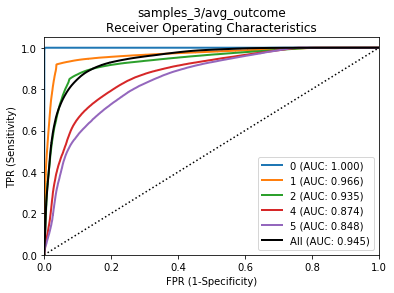

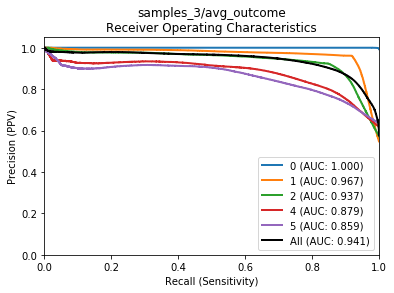

samples_3/avg_outcome (0)
	Brier: 0.012
	Precision: 0.999
	Recall: 0.993
	F1: 0.996

samples_3/avg_outcome (1)
	Brier: 0.059
	Precision: 0.961
	Recall: 0.918
	F1: 0.939

samples_3/avg_outcome (2)
	Brier: 0.093
	Precision: 0.921
	Recall: 0.852
	F1: 0.885

samples_3/avg_outcome (4)
	Brier: 0.143
	Precision: 0.786
	Recall: 0.868
	F1: 0.825

samples_3/avg_outcome (5)
	Brier: 0.155
	Precision: 0.768
	Recall: 0.852
	F1: 0.808

samples_3/avg_outcome (All)
	Brier: 0.092
	Precision: 0.875
	Recall: 0.894
	F1: 0.884



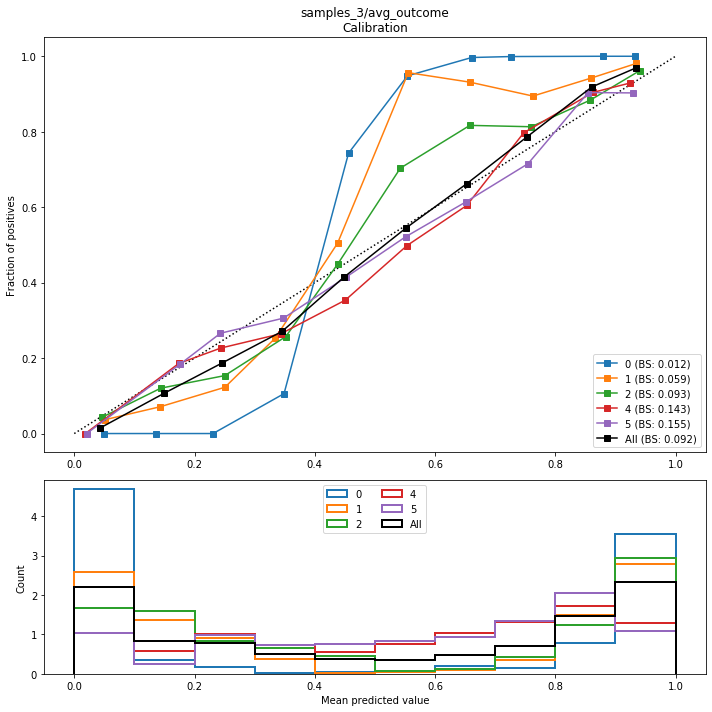

In [13]:
p_train = Prepper.population(ds["train"], tfp, final_model)
p_train.roc_curves()
p_train.pr_curves()
p_train.calibration_curves()

Done: 28
samples_3/avg_outcome 0 - mean label: 0.471, pred: 0.456
samples_3/avg_outcome 1 - mean label: 0.492, pred: 0.487
samples_3/avg_outcome 2 - mean label: 0.512, pred: 0.517
samples_3/avg_outcome 4 - mean label: 0.545, pred: 0.557
samples_3/avg_outcome 5 - mean label: 0.559, pred: 0.571


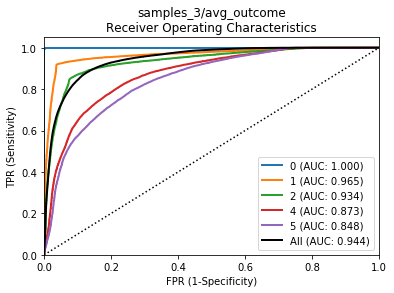

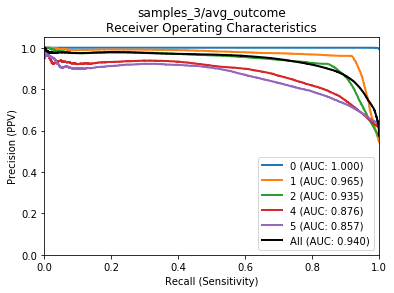

samples_3/avg_outcome (0)
	Brier: 0.012
	Precision: 0.999
	Recall: 0.993
	F1: 0.996

samples_3/avg_outcome (1)
	Brier: 0.059
	Precision: 0.960
	Recall: 0.917
	F1: 0.938

samples_3/avg_outcome (2)
	Brier: 0.094
	Precision: 0.919
	Recall: 0.851
	F1: 0.884

samples_3/avg_outcome (4)
	Brier: 0.144
	Precision: 0.779
	Recall: 0.865
	F1: 0.820

samples_3/avg_outcome (5)
	Brier: 0.156
	Precision: 0.762
	Recall: 0.849
	F1: 0.803

samples_3/avg_outcome (All)
	Brier: 0.093
	Precision: 0.872
	Recall: 0.892
	F1: 0.882



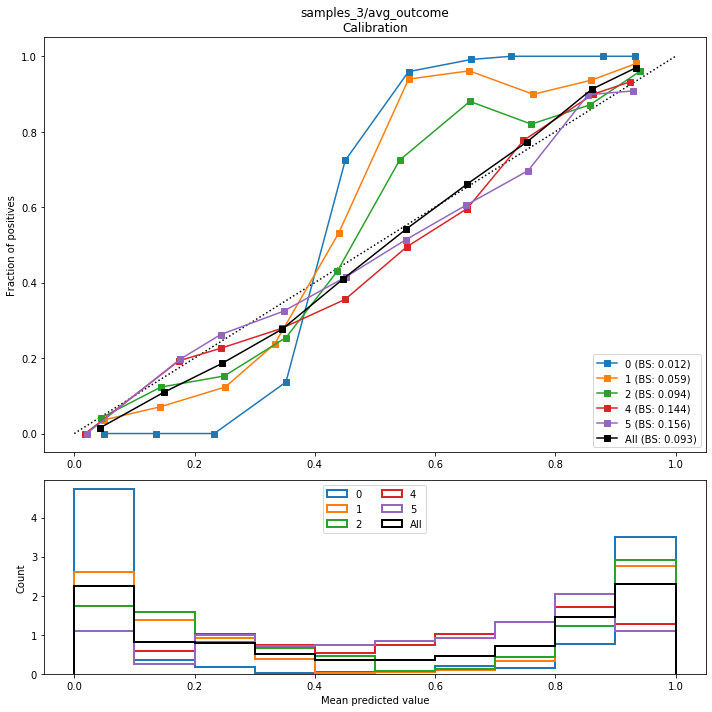

In [14]:
p_dev = Prepper.population(ds["dev"], tfp, final_model)
p_dev.roc_curves()
p_dev.pr_curves()
p_dev.calibration_curves()

Done: 3
samples_3/avg_outcome 0 - mean label: 0.482, pred: 0.467
samples_3/avg_outcome 1 - mean label: 0.503, pred: 0.497
samples_3/avg_outcome 2 - mean label: 0.521, pred: 0.526
samples_3/avg_outcome 4 - mean label: 0.550, pred: 0.564
samples_3/avg_outcome 5 - mean label: 0.562, pred: 0.578


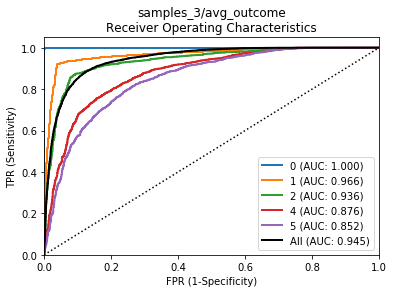

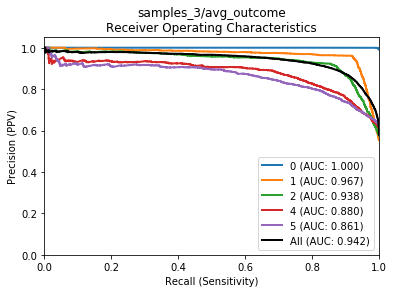

samples_3/avg_outcome (0)
	Brier: 0.012
	Precision: 1.000
	Recall: 0.993
	F1: 0.996

samples_3/avg_outcome (1)
	Brier: 0.059
	Precision: 0.961
	Recall: 0.918
	F1: 0.939

samples_3/avg_outcome (2)
	Brier: 0.093
	Precision: 0.921
	Recall: 0.857
	F1: 0.887

samples_3/avg_outcome (4)
	Brier: 0.142
	Precision: 0.783
	Recall: 0.874
	F1: 0.826

samples_3/avg_outcome (5)
	Brier: 0.154
	Precision: 0.768
	Recall: 0.856
	F1: 0.810

samples_3/avg_outcome (All)
	Brier: 0.092
	Precision: 0.875
	Recall: 0.897
	F1: 0.886



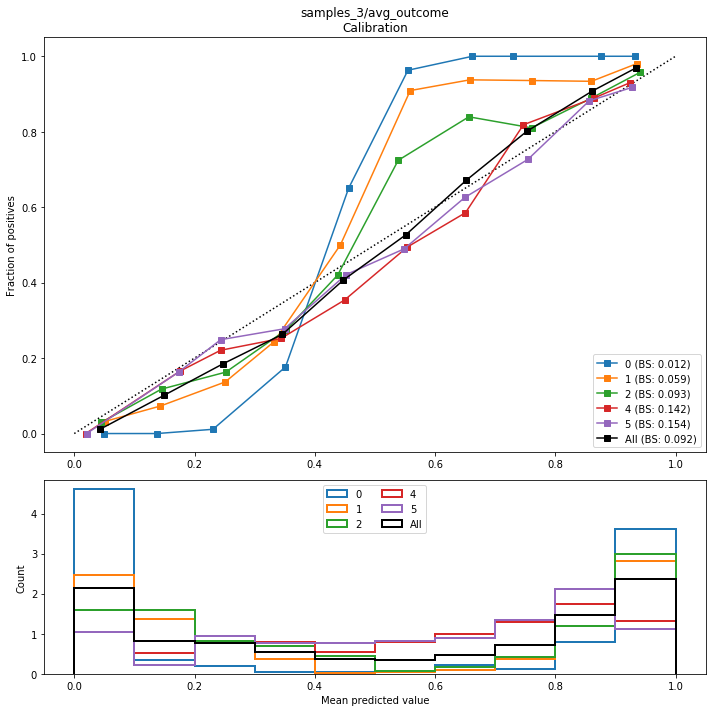

In [15]:
p_test = Prepper.population(ds["test"], tfp, final_model)
p_test.roc_curves()
p_test.pr_curves()
p_test.calibration_curves()

Done: 126
samples_3/avg_outcome 0 - mean label: 0.475, pred: 0.485
samples_3/avg_outcome 1 - mean label: 0.497, pred: 0.529
samples_3/avg_outcome 2 - mean label: 0.517, pred: 0.482
samples_3/avg_outcome 4 - mean label: 0.551, pred: 0.453
samples_3/avg_outcome 5 - mean label: 0.565, pred: 0.553


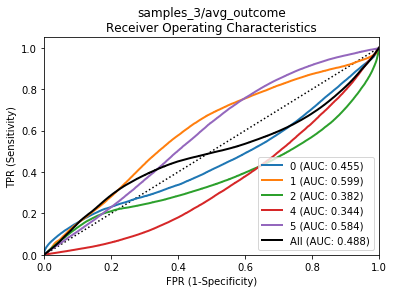

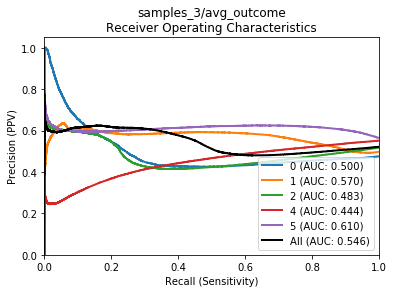

samples_3/avg_outcome (0)
	Brier: 0.252
	Precision: 0.463
	Recall: 0.280
	F1: 0.349

samples_3/avg_outcome (1)
	Brier: 0.248
	Precision: 0.498
	Recall: 0.926
	F1: 0.647

samples_3/avg_outcome (2)
	Brier: 0.256
	Precision: 0.523
	Recall: 0.216
	F1: 0.306

samples_3/avg_outcome (4)
	Brier: 0.266
	Precision: 0.247
	Recall: 0.023
	F1: 0.042

samples_3/avg_outcome (5)
	Brier: 0.242
	Precision: 0.572
	Recall: 0.983
	F1: 0.724

samples_3/avg_outcome (All)
	Brier: 0.253
	Precision: 0.520
	Recall: 0.489
	F1: 0.504



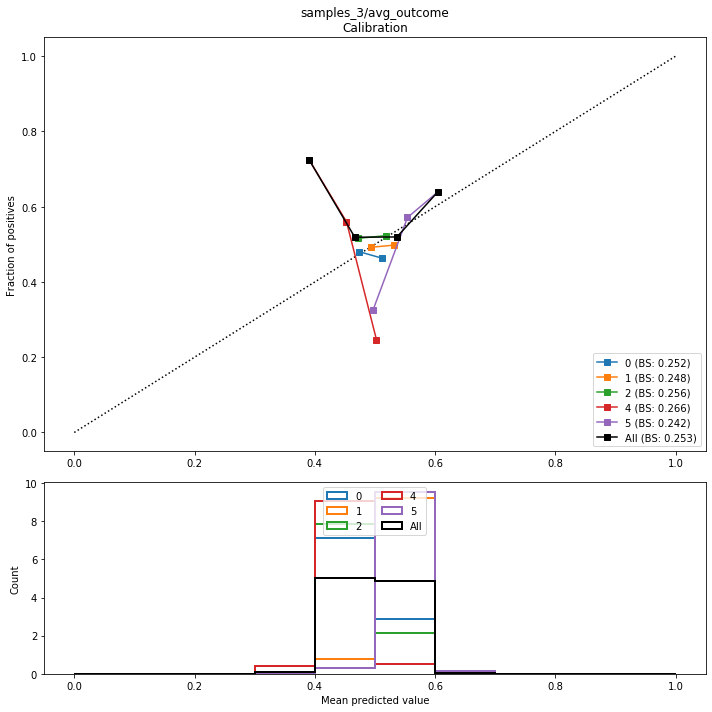

In [16]:
p_train = Prepper.population(ds["train"], tfp, final_wo_model)
p_train.roc_curves()
p_train.pr_curves()
p_train.calibration_curves()

Done: 28
samples_3/avg_outcome 0 - mean label: 0.471, pred: 0.485
samples_3/avg_outcome 1 - mean label: 0.492, pred: 0.529
samples_3/avg_outcome 2 - mean label: 0.512, pred: 0.482
samples_3/avg_outcome 4 - mean label: 0.545, pred: 0.453
samples_3/avg_outcome 5 - mean label: 0.559, pred: 0.553


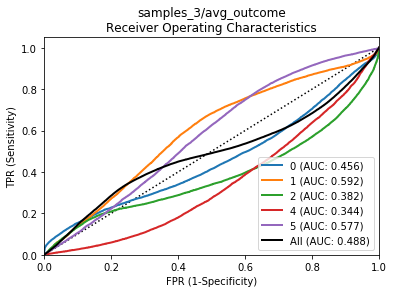

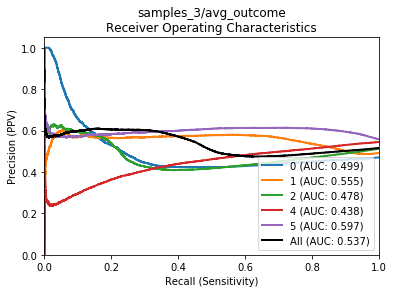

samples_3/avg_outcome (0)
	Brier: 0.252
	Precision: 0.457
	Recall: 0.280
	F1: 0.347

samples_3/avg_outcome (1)
	Brier: 0.249
	Precision: 0.492
	Recall: 0.922
	F1: 0.642

samples_3/avg_outcome (2)
	Brier: 0.255
	Precision: 0.514
	Recall: 0.217
	F1: 0.305

samples_3/avg_outcome (4)
	Brier: 0.266
	Precision: 0.241
	Recall: 0.023
	F1: 0.041

samples_3/avg_outcome (5)
	Brier: 0.243
	Precision: 0.565
	Recall: 0.982
	F1: 0.718

samples_3/avg_outcome (All)
	Brier: 0.253
	Precision: 0.514
	Recall: 0.488
	F1: 0.500



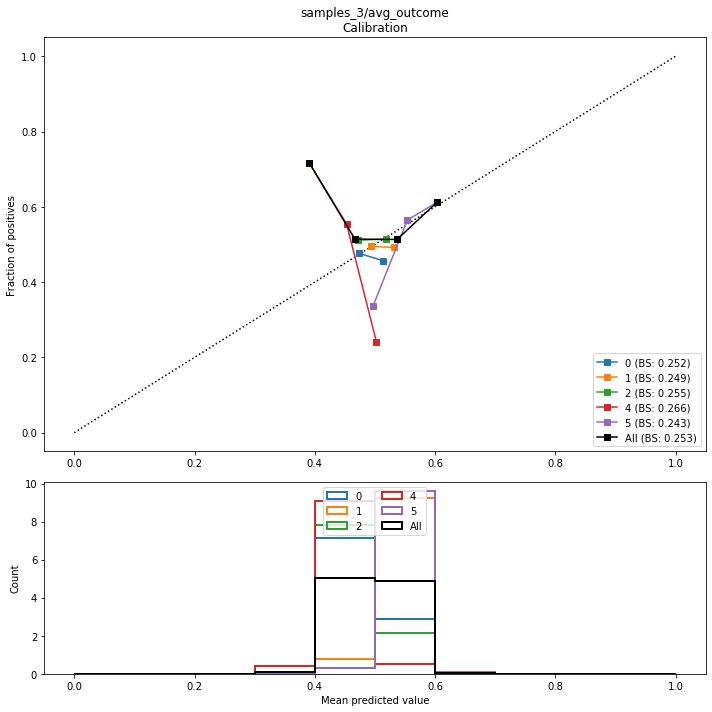

In [17]:
p_dev = Prepper.population(ds["dev"], tfp, final_wo_model)
p_dev.roc_curves()
p_dev.pr_curves()
p_dev.calibration_curves()

Done: 3
samples_3/avg_outcome 0 - mean label: 0.482, pred: 0.484
samples_3/avg_outcome 1 - mean label: 0.503, pred: 0.528
samples_3/avg_outcome 2 - mean label: 0.521, pred: 0.482
samples_3/avg_outcome 4 - mean label: 0.550, pred: 0.451
samples_3/avg_outcome 5 - mean label: 0.562, pred: 0.553


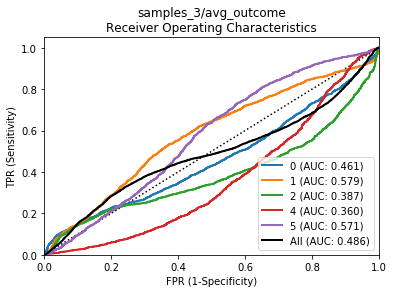

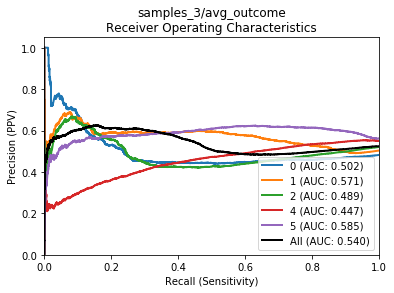

samples_3/avg_outcome (0)
	Brier: 0.252
	Precision: 0.461
	Recall: 0.262
	F1: 0.334

samples_3/avg_outcome (1)
	Brier: 0.248
	Precision: 0.497
	Recall: 0.902
	F1: 0.641

samples_3/avg_outcome (2)
	Brier: 0.256
	Precision: 0.527
	Recall: 0.229
	F1: 0.319

samples_3/avg_outcome (4)
	Brier: 0.265
	Precision: 0.242
	Recall: 0.020
	F1: 0.036

samples_3/avg_outcome (5)
	Brier: 0.243
	Precision: 0.566
	Recall: 0.975
	F1: 0.716

samples_3/avg_outcome (All)
	Brier: 0.253
	Precision: 0.519
	Recall: 0.481
	F1: 0.499



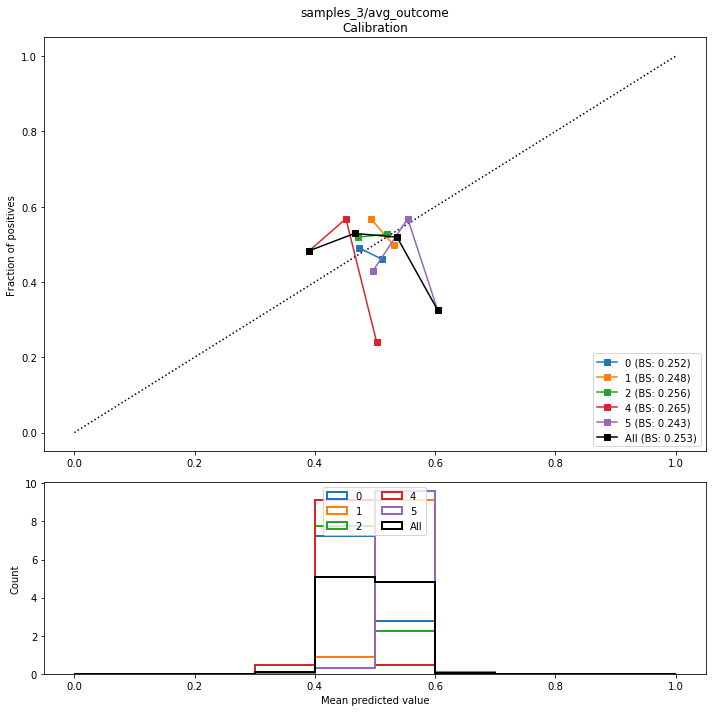

In [18]:
p_test = Prepper.population(ds["test"], tfp, final_wo_model)
p_test.roc_curves()
p_test.pr_curves()
p_test.calibration_curves()

# Examine Individual Trajectories

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 1. 1. 1.]
[0.] [0. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 0. 0. 0.]
[1.] [1. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]



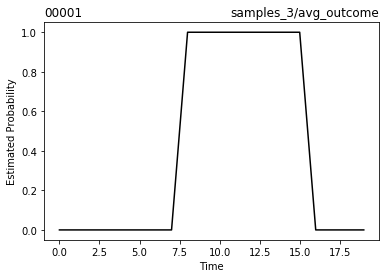

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.] [0.2  0.23 0.25 0.3  0.31]
[0.] [0. 0. 0. 0. 0.] [0.05 0.07 0.09 0.18 0.2 ]
[0.] [0. 0. 0. 0. 0.] [0.04 0.05 0.08 0.2  0.23]
[0.] [0. 0. 0. 0. 1.] [0.04 0.07 0.11 0.27 0.32]
[0.] [0. 0. 0. 1. 1.] [0.04 0.07 0.12 0.31 0.37]
[0.] [0. 0. 0. 1. 1.] [0.04 0.09 0.15 0.35 0.42]
[0.] [0. 0. 1. 1. 1.] [0.05 0.13 0.21 0.43 0.51]
[0.] [0. 1. 1. 1. 1.] [0.05 0.12 0.19 0.44 0.52]
[1.] [1. 1. 1. 1. 1.] [0.63 0.78 0.85 0.87 0.89]
[1.] [1. 1. 1. 1. 1.] [0.9  0.92 0.94 0.91 0.91]
[1.] [1. 1. 1. 1. 1.] [0.93 0.92 0.93 0.87 0.86]
[1.] [1. 1. 1. 1. 0.] [0.93 0.9  0.9  0.83 0.79]
[1.] [1. 1. 1. 0. 0.] [0.94 0.92 0.92 0.83 0.8 ]
[1.] [1. 1. 1. 0. 0.] [0.93 0.88 0.88 0.77 0.72]
[1.] [1. 1. 0. 0. 0.] [0.89 0.82 0.79 0.67 0.59]
[1.] [1. 0. 0. 0. 0.] [0.89 0.82 0.8  0.64 0.57]
[0.] [0. 0. 0. 0. 0.] [0.18 0.11 0.09 0.08 0.07]
[0.] [0. 0. 0. 0. 0.] [0.04 0.02 0.02 0.02 0.02]
[0.] [0. 0. 0. 0. 0.] [0.03 0.01 0.01 0.01 0.01]
[0.] [0. 0. 0. 0. 0.] [0.02 0.01 0.01 0.

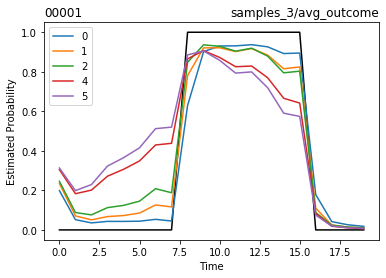

In [19]:
e = Prepper.entity("00001", tfp)
e.print_labels()
e.plot()
e.predict(final_model)
e.print_labels()
e.plot()

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 1. 1. 1.]
[0.] [0. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 0. 0. 0.]
[1.] [1. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]



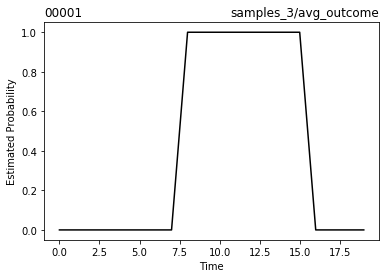

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.] [0.5 0.5 0.5 0.5 0.5]
[0.] [0. 0. 0. 0. 0.] [0.49 0.5  0.5  0.5  0.5 ]
[0.] [0. 0. 0. 0. 0.] [0.48 0.5  0.5  0.5  0.52]
[0.] [0. 0. 0. 0. 1.] [0.47 0.5  0.51 0.5  0.52]
[0.] [0. 0. 0. 1. 1.] [0.47 0.5  0.51 0.5  0.52]
[0.] [0. 0. 0. 1. 1.] [0.47 0.5  0.52 0.49 0.52]
[0.] [0. 0. 1. 1. 1.] [0.46 0.5  0.52 0.49 0.52]
[0.] [0. 1. 1. 1. 1.] [0.46 0.5  0.52 0.49 0.52]
[1.] [1. 1. 1. 1. 1.] [0.45 0.5  0.52 0.48 0.53]
[1.] [1. 1. 1. 1. 1.] [0.44 0.5  0.52 0.48 0.54]
[1.] [1. 1. 1. 1. 1.] [0.44 0.5  0.53 0.47 0.55]
[1.] [1. 1. 1. 1. 0.] [0.43 0.5  0.53 0.47 0.57]
[1.] [1. 1. 1. 0. 0.] [0.43 0.5  0.53 0.46 0.57]
[1.] [1. 1. 1. 0. 0.] [0.43 0.5  0.53 0.46 0.57]
[1.] [1. 1. 0. 0. 0.] [0.43 0.5  0.53 0.46 0.58]
[1.] [1. 0. 0. 0. 0.] [0.42 0.5  0.53 0.46 0.58]
[0.] [0. 0. 0. 0. 0.] [0.42 0.5  0.53 0.46 0.59]
[0.] [0. 0. 0. 0. 0.] [0.42 0.5  0.54 0.45 0.58]
[0.] [0. 0. 0. 0. 0.] [0.42 0.51 0.54 0.46 0.58]
[0.] [0. 0. 0. 0. 0.] [0.42 0.51 0.55 0.46 0.

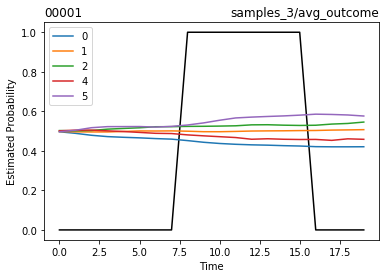

In [20]:
e = Prepper.entity("00001", tfp)
e.print_labels()
e.plot()
e.predict(final_wo_model)
e.print_labels()
e.plot()

# Additional Feature Development

In [21]:
idx="00000"
s_X, s_Y = tfp.get_specific_XY(idx)

In [22]:
s_Y_h = final_model.predict(s_X)

for i, lb in enumerate(tfp.label_fns):
    print(s_Y_h[i].shape, s_Y[lb].shape)

(20, 5) (5, 20, 1)


In [23]:
np.set_printoptions(precision=3)
for fn, v in s_X.items():
    print(fn, "\n", np.squeeze(np.array(v)))

i_id 
 [b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000'
 b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000'
 b'00000' b'00000' b'00000' b'00000']
i_duration 
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
characteristics_0/age 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/sex 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
characteristics_0/eth_e0 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e1 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e2 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e3 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
characteristics_0/eth_e4 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e5 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth__OTHER

In [24]:
for i in ds["train"].take(1):
    x, y = i
    for k, v in x.items():
        print(k, '\n', v.shape, '\n')
    
    for i, _y in enumerate(y):
        print("y[%s]" %(i), '\n', _y.shape, '\n')

print("Avg y value: ", np.mean(y))

i_id 
 (64, 37, 1) 

i_duration 
 (64, 37, 1) 

characteristics_0/age 
 (64, 37, 1) 

characteristics_0/sex 
 (64, 37, 1) 

characteristics_0/eth_e0 
 (64, 37, 1) 

characteristics_0/eth_e1 
 (64, 37, 1) 

characteristics_0/eth_e2 
 (64, 37, 1) 

characteristics_0/eth_e3 
 (64, 37, 1) 

characteristics_0/eth_e4 
 (64, 37, 1) 

characteristics_0/eth_e5 
 (64, 37, 1) 

characteristics_0/eth__OTHER_ 
 (64, 37, 1) 

characteristics_0/bin_ldc_A 
 (64, 37, 1) 

characteristics_0/bin_ldc_B 
 (64, 37, 1) 

characteristics_0/bin_ldc__OTHER_ 
 (64, 37, 1) 

characteristics_0/job 
 (64, 37, 1) 

samples_0/avg_SBP 
 (64, 37, 1) 

samples_0/min_SBP 
 (64, 37, 1) 

samples_0/max_SBP 
 (64, 37, 1) 

samples_0/avg_DBP 
 (64, 37, 1) 

samples_0/min_DBP 
 (64, 37, 1) 

samples_0/max_DBP 
 (64, 37, 1) 

samples_0/avg_type_c0 
 (64, 37, 1) 

samples_0/avg_type_c1 
 (64, 37, 1) 

samples_0/avg_type_c2 
 (64, 37, 1) 

samples_0/avg_type_c3 
 (64, 37, 1) 

samples_0/avg_type_c4 
 (64, 37, 1) 

samples_0/avg_